{'A': {'edges': {'B': {'coste': 3}, 'C': {'coste': 1}}, 'x': 1, 'y': 5},
 'B': {'edges': {'A': {'coste': 3},
                 'C': {'coste': 7},
                 'D': {'coste': 5},
                 'E': {'coste': 4}},
       'x': 3,
       'y': 6},
 'C': {'edges': {'A': {'coste': 1}, 'B': {'coste': 7}, 'D': {'coste': 2}},
       'x': 2,
       'y': 0},
 'D': {'edges': {'B': {'coste': 5}, 'C': {'coste': 2}, 'E': {'coste': 9}},
       'x': 4,
       'y': 2},
 'E': {'edges': {'B': {'coste': 4}, 'D': {'coste': 9}}, 'x': 5, 'y': 7}}


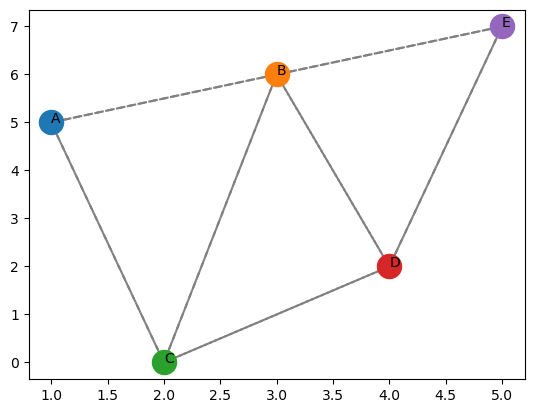

In [1]:
import pprint
import matplotlib.pyplot as plt

class ErrNodoGrafo(Exception):
  def __init__(self, message='nodo no existe en el grafo'):
    super().__init__(message)


class Grafo:
  def __init__(self):
    self.nodos = {}
    self.abiertos = []
    self.cerrados = []

  def add_node(self, nodo, **kargs):
    if nodo in self.nodos: raise ErrNodoGrafo(message="Nodo Ya Existe!!")
    self.nodos[nodo] = {"edges":{}}
    for k,v in kargs.items():
      self.nodos[nodo][k] = v

  def remove_node(self, nodo):
    if nodo not in self.nodos: raise ErrNodoGrafo
    # desconectarme de todos los nodos con los que tengo aristas
    for n in self.nodos[nodo]["edges"]:
      self.nodos[n]["edges"].pop(nodo)
    self.nodos.pop(nodo)

  def set_node_attributes(self, nodo, **kargs):
    for k,v in kargs.items():
      self.nodos[nodo][k] = v

  def get_node_attribute(self, nodo, attribute, default=None):
    ret = self.nodos[nodo].get(attribute, default)
    return ret

  def add_edge(self, nodo1, nodo2, **kargs):
    if nodo1 not in self.nodos or nodo2 not in self.nodos: raise ErrNodoGrafo
    self.nodos[nodo1]["edges"][nodo2] = kargs
    self.nodos[nodo2]["edges"][nodo1] = kargs

  def remove_edge(self, nodo1, nodo2):
    if nodo1 not in self.nodos or nodo2 not in self.nodos: raise ErrNodoGrafo
    self.nodos[nodo1]["edges"].pop(nodo2, None)
    self.nodos[nodo2]["edges"].pop(nodo1, None)

  def set_edge_attributes(self, nodo1, nodo2, **kargs):
    for k,v in kargs.items():
      self.nodos[nodo1]["edges"][nodo2][k] = v

  def get_edge_attribute(self, nodo1, nodo2, attribute, default=None):
    ret = self.nodos[nodo1]["edges"][nodo2].get(attribute, default)
    return ret

  # returna una lista con los nodos conectados
  def adj(self, nodo):
    adyacentes = [n for n in self.nodos[nodo]["edges"]]
    return adyacentes


  def dibuja(self):
    fig, ax = plt.subplots()

    for nodo,datos in self.nodos.items():
      for vecino,cosas in datos["edges"].items():
        x1,y1 = self.get_node_attribute(nodo,"x",0),self.get_node_attribute(nodo,"y",0)
        x2,y2 = self.get_node_attribute(vecino,"x",0),self.get_node_attribute(vecino,"y",0)
        ax.plot([x1, x2], [y1, y2], color="gray", linestyle="--", zorder=1)

    for n in self.nodos:
      x = self.get_node_attribute(n, "x", 0)
      y = self.get_node_attribute(n, "y", 0)
      ax.scatter(x, y, s=300)
      ax.text(x,y, n)
  
  def dijkstra(self):
    

  # quita y devuelve un nodo de abiertos,
  # si modo = profundidad devuelve el último en entrar LIFO
  # si modo = anchura devuelve el primero en entrar (FIFO)
  # .....
  def pop_abiertos(self, modo):
    ret = None
    if modo == "profundidad":
      ret = self.abiertos.pop()
    elif modo == "anchura":
      ret = self.abiertos.pop(0)
    return ret

  # si el nodo es una solución del problema devuelve TRUE
  def es_solucion(self, nodo_actual):
    print(f"Procesando nodo: {nodo_actual}")
    return False

  # devuelve una lista con todos los nodos conectados al nodo actual
  def genera_sucesores(self, nodo_actual):
    return self.adj(nodo_actual)

  # devuelve una lista con los hijos, decidiendo que hacer si ya están en abiertos o cerrados
  def procesa_repetidos(self, hijos_iniciales):
    # print(f"procesa_repetidos: {hijos_iniciales}")
    hijos = [h for h in hijos_iniciales if h not in self.abiertos and h not in self.cerrados]
    return hijos

  # hacer recorridos del grafo en profundidad, anchura, ....
  def recorre_grafo(self, nodo_inicial = None, modo="anchura"):
    self.abiertos = []
    self.cerrados = []

    # si no se proporciona inicial escojo el primero que se creó
    if nodo_inicial is None: nodo_inicial = list(self.nodos.keys())[0]
    # metemos en abiertos el nodo inicial
    self.abiertos.append(nodo_inicial)

    while len(self.abiertos) > 0: # mientras en abiertos existan nodos
      # quitar un nodo
      actual = self.pop_abiertos(modo)

      # mirar si es una solución
      # si tal break
      if self.es_solucion(actual):
        break

      # actual a cerrado
      self.cerrados.append(actual)

      # generar sucesores
      hijos = self.genera_sucesores(actual)

      # que hacer con los repetidos
      hijos = self.procesa_repetidos(hijos)


      # insertar los hijos en abiertos
      for hijo in hijos:
        self.abiertos.append(hijo)

g = Grafo()
g.add_node("A", x=1, y=5)
g.add_node("B", x=3, y=6)
g.add_node("C", x=2, y=0)
g.add_node("D", x=4, y=2)
g.add_node("E", x=5, y=7)
g.add_edge("A", "B", coste=3)
g.add_edge("A", "C", coste=1)
g.add_edge("B", "C", coste=7)
g.add_edge("C", "D", coste=2)
g.add_edge("B", "D", coste=5)
g.add_edge("B", "E", coste=4)
g.add_edge("D", "E", coste=9)
pprint.pprint(g.nodos)
g.dibuja()
#pprint.pprint(g.nodos)
#g.recorre_grafo(modo="profundidad")

  
